In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train), (X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

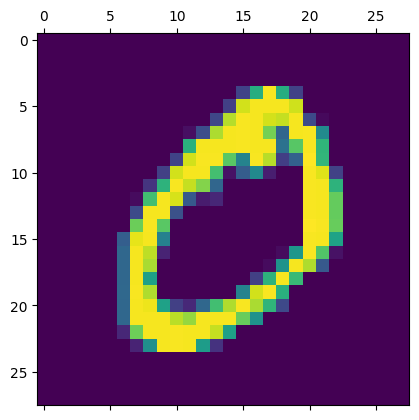

In [8]:
plt.matshow(X_train[1])

In [9]:
y_train[1]

0

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

<b> Scaling

In [11]:
X_train = X_train/255
X_test = X_test/255

In [12]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [15]:
X_test_flattened.shape

(10000, 784)

<img src="digits_nn.jpg">

<h1>Neural Network</h1>

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8085 - loss: 0.7293
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9147 - loss: 0.3022
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2813
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9245 - loss: 0.2701
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9256 - loss: 0.2687
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9286 - loss: 0.2601
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9303 - loss: 0.2521
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9298 - loss: 0.2516
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9299 - loss: 0.2521
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9324 - loss: 0.2457


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9162 - loss: 0.2988


[0.2646232545375824, 0.9269999861717224]

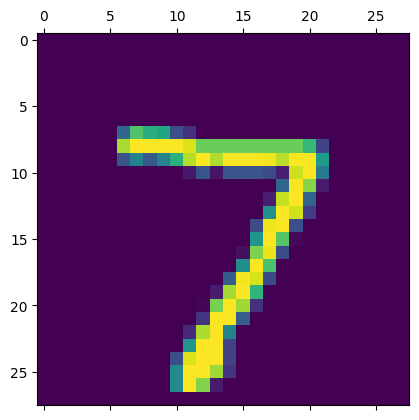

In [18]:
plt.matshow(X_test[0])

In [19]:
y_pred = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
y_pred[0]

array([3.0122807e-03, 1.2478283e-08, 2.0545498e-02, 9.7014672e-01,
       1.8152394e-03, 1.9454037e-01, 6.1596474e-08, 9.9982148e-01,
       7.1231224e-02, 6.8074435e-01], dtype=float32)

In [21]:
np.argmax(y_pred[0])

7

In [22]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [23]:
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

<b>Confushion Matrix

In [24]:
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 946,    0,    4,    2,    1,    9,   13,    2,    2,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    8,  939,   13,    8,    5,   11,    8,   34,    3],
       [   2,    0,   18,  924,    1,   25,    2,   12,   22,    4],
       [   1,    1,    6,    2,  924,    0,    9,    4,    9,   26],
       [   6,    2,    3,   32,    9,  785,   17,    6,   27,    5],
       [   7,    3,    9,    1,    7,   11,  917,    1,    2,    0],
       [   1,    6,   25,    8,    9,    1,    0,  946,    2,   30],
       [   4,    9,    6,   23,    9,   30,   10,    8,  866,    9],
       [   6,    8,    3,   10,   34,    7,    0,   21,    8,  912]])>

Text(95.72222222222221, 0.5, 'Truth')

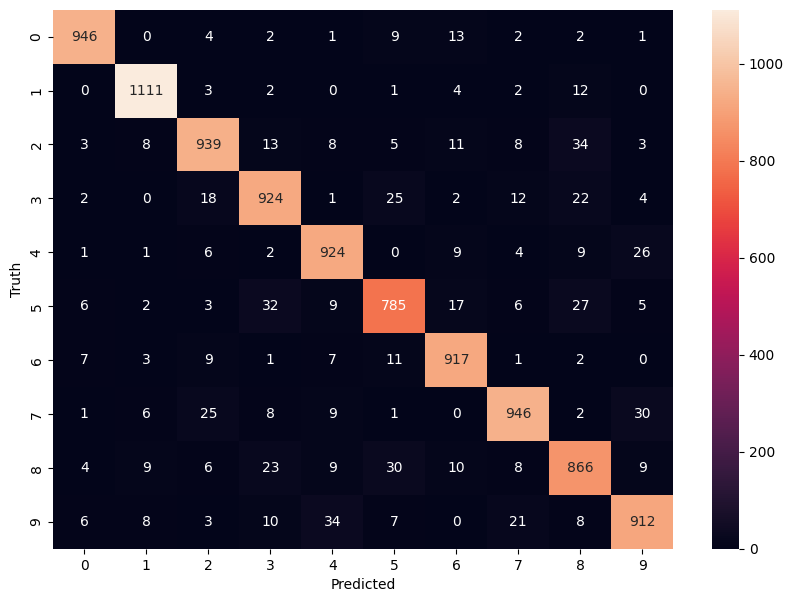

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h1>Adding A Hidden Layers</h1>

In [26]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8737 - loss: 0.4493
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9612 - loss: 0.1325
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9756 - loss: 0.0851
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9797 - loss: 0.0646
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9862 - loss: 0.0463
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9885 - loss: 0.0382
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9928 - loss: 0.0253
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9942 - loss: 0.0207
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9948 - loss: 0.0174


In [27]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.1026


[0.08693157881498337, 0.9772999882698059]

In [28]:
y_pred = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_pred]
y_predicted_labels[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[7, 2, 1, 0, 4]

In [29]:
cm = tf.math.confusion_matrix(labels=y_test,predictions= y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    0,    0,    1,    3,    1,    1,    1],
       [   0, 1126,    3,    1,    0,    1,    2,    1,    1,    0],
       [   4,    0, 1010,    1,    4,    0,    2,    8,    2,    1],
       [   0,    0,    5,  982,    0,   11,    0,    4,    1,    7],
       [   0,    1,    1,    1,  962,    1,    6,    2,    1,    7],
       [   2,    1,    0,    3,    1,  882,    2,    0,    1,    0],
       [   5,    3,    2,    1,    4,    7,  935,    0,    1,    0],
       [   0,    1,    9,    3,    0,    0,    0, 1011,    1,    3],
       [   4,    1,    8,    8,    5,    9,    2,    3,  932,    2],
       [   2,    6,    0,    7,   13,    4,    0,   15,    1,  961]])>

Text(95.72222222222221, 0.5, 'Truth')

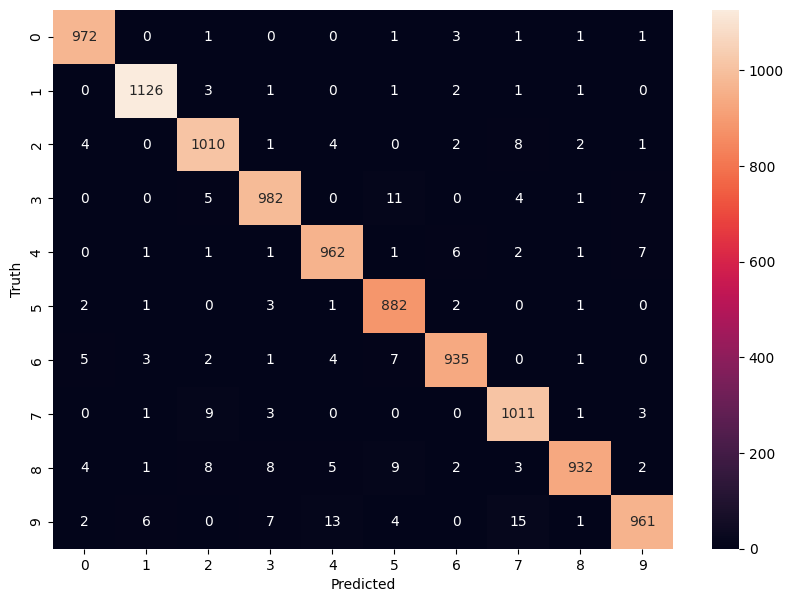

In [30]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<b>Use keras Flatten

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train,y_train,epochs=10)

C:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8763 - loss: 0.4476
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9628 - loss: 0.1279
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9757 - loss: 0.0824
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0631
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9858 - loss: 0.0477
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9884 - loss: 0.0387
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9909 - loss: 0.0304
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0232
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0206
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9948 - loss: 0.0174
